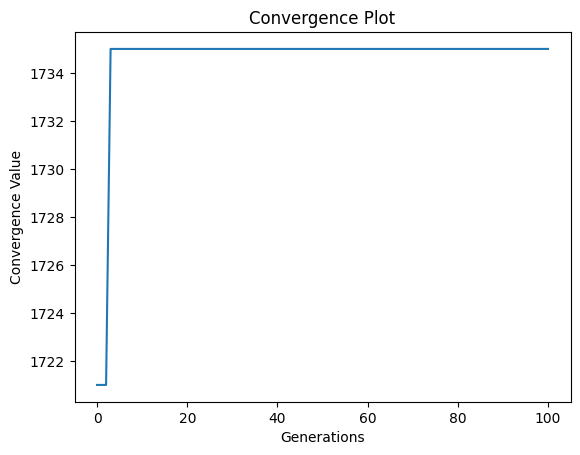

In [1]:
import random
import matplotlib.pyplot as plt


class GeneticAlgorithm:
    def __init__(self, capacity, weights, profits, population_size, generations):

        self.capacity = capacity
        self.weights = weights
        self.profits = profits
        self.population_size = population_size
        self.generations = generations

    def generate_random_individual(self):
        '''
        First of all, randomly generate a solution
        '''

        return [random.randint(0, 1) for _ in range(len(self.weights))]

    def calculate_fitness(self, individual):
        '''
        Return total profit if total_weight <= self.capacity
        '''
        total_weight = sum(individual[i] * self.weights[i]
                           for i in range(len(self.weights)))
        total_profit = sum(individual[i] * self.profits[i]
                           for i in range(len(self.profits)))

        return total_profit if total_weight <= self.capacity else 0

    def generate_initial_population(self):
        """
        generating initial population
        """

        return [self.generate_random_individual() for _ in range(self.population_size)]

    def tournament_selection(self, population):
        """
        Using tournament selection method to select individuals
        """
        tournament_size = 3
        tournament_individuals = random.sample(population, tournament_size)

        return max(tournament_individuals, key=self.calculate_fitness)

    def crossover(self, parent1, parent2):
        """
        Performing crossover, cutoff points are randomly generated.
        """
        crossover_point = random.randint(0, len(parent1) - 1)
        child = parent1[:crossover_point] + parent2[crossover_point:]

        return child

    def mutation(self, individual):
        """
        Performing mutation, cutoff points are randomly generated.
        """
        mutation_point = random.randint(0, len(individual) - 1)
        individual[mutation_point] = 1 - individual[mutation_point]

        return individual

    def genetic_algorithm(self):
        """
        Execute the genetic algorithm,
          and collect the best fitness value of each generation during the convergence process
        """
        # randomly generate a solution
        population = self.generate_initial_population()
        # calculate its total profit
        convergence_values = [
            max([self.calculate_fitness(individual) for individual in population])]

        # iteration = 100
        for _ in range(self.generations):
            new_population = []

            for _ in range(self.population_size):

                parent1 = self.tournament_selection(population)
                parent2 = self.tournament_selection(population)
                child = self.crossover(parent1, parent2)

                if random.random() < 0.1:  # Mutation rate
                    child = self.mutation(child)

                new_population.append(child)

            population = new_population

            # collect the convergence values
            convergence_values.append(
                max([self.calculate_fitness(individual) for individual in population]))

        return convergence_values


def plot_convergence(convergence_values):
    """
    Charting the Concessions
    """
    plt.plot(range(len(convergence_values)), convergence_values)
    plt.xlabel('Generations')
    plt.ylabel('Convergence Value')
    plt.title('Convergence Plot')
    plt.show()


def main():
    capacity = 170
    weights = [41, 50, 49, 59, 55, 57, 60]
    profits = [442, 525, 511, 593, 546, 564, 617]
    population_size = 50
    generations = 100

    # Genetic algorithm
    ga = GeneticAlgorithm(capacity, weights, profits,
                          population_size, generations)
    convergence_values = ga.genetic_algorithm()

    # Charting the Concessions
    plot_convergence(convergence_values)


if __name__ == "__main__":
    main()